In [1]:
import cv2
import numpy as np
import pandas as pd
import os
img = cv2.imread('/home/ashutosh/Downloads/final/data/train/0a9f8f6543d0b33fe9474035dd5323ef.jpg',1)
rows,cols,ch =img.shape


In [2]:
def rotation(img):
     
    rows,cols,ch = img.shape

    M = cv2.getRotationMatrix2D((cols/2,rows/2),10,1)
    dst = cv2.warpAffine(img,M,(cols,rows))
    return dst

In [3]:
def affine_transformation(img):
    pts1 = np.float32([[50,50],[200,50],[50,200]])
    pts2 = np.float32([[10,100],[200,50],[100,250]])
    rows,cols,ch = img.shape
    M = cv2.getAffineTransform(pts1,pts2)

    dst = cv2.warpAffine(img,M,(cols,rows))
    return dst

In [4]:
def flip(img):
    return cv2.flip(img,1)

In [5]:
a=pd.read_csv("/home/ashutosh/Downloads/final/data/labels.csv")

In [7]:
k=0
for j in range(len(a)):
    k=k+j
    x=a.iloc[j]['id']+'.jpg'
    data_path='/home/ashutosh/Downloads/final/data/train/'
    image_path = os.path.join(data_path,x)
   
    inputa = cv2.imread(image_path)
    
    if inputa is not None:
        
        p='/home/ashutosh/Downloads/final/data/train/'+x
        
        #ROTATION
        img=rotation(inputa)
        k=k+1
        f=a.iloc[j]['id']
        cv2.imwrite('/home/ashutosh/Downloads/final/aug/'+f+str(k)+str(j)+'.jpg',img)
        a=a.append({'id':f+str(k)+str(j),'breed':a.iloc[j]['breed']},ignore_index=True)
        
        #FLIP 
        img=flip(inputa)
        k=k+1
        f=a.iloc[j]['id']
        cv2.imwrite('/home/ashutosh/Downloads/final/aug/'+f+str(k)+str(j)+'.jpg',img)
        a=a.append({'id':f+str(k)+str(j),'breed':a.iloc[j]['breed']},ignore_index=True)
        
        #Affine_transformation
        img=affine_transformation(inputa)
        k=k+1
        f=a.iloc[j]['id']
        cv2.imwrite('/home/ashutosh/Downloads/final/aug/'+f+str(k)+str(j)+'.jpg',img)
        a=a.append({'id':f+str(k)+str(j),'breed':a.iloc[j]['breed']},ignore_index=True)
        
 
            
    else:
        print 'image didnt load'


# Example

In [8]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import matplotlib.image as mpimg

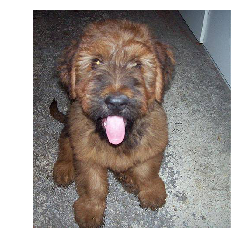

In [9]:
image = mpimg.imread('/home/ashutosh/Downloads/final/data/train/0a9f8f6543d0b33fe9474035dd5323ef.jpg')
plt.imshow(image);
plt.axis('off');

<function rotation at 0x7fc6804880c8>


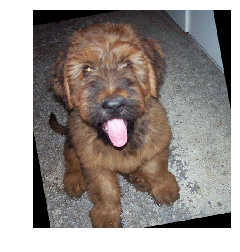

<function flip at 0x7fc63a7f1c80>


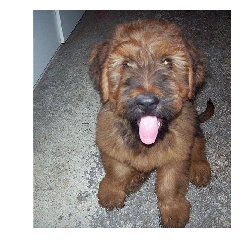

<function affine_transformation at 0x7fc6804ebcf8>


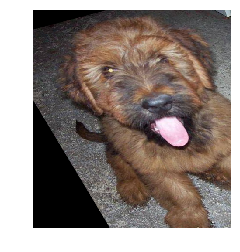

In [27]:
 
pics=[rotation,flip,affine_transformation]

for pic in pics:
    print pic
    img =pic(image)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    